# Introductions to Regression with Neural Networks in tensorflow

There are may definitios for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf

## Creating data to view and fit

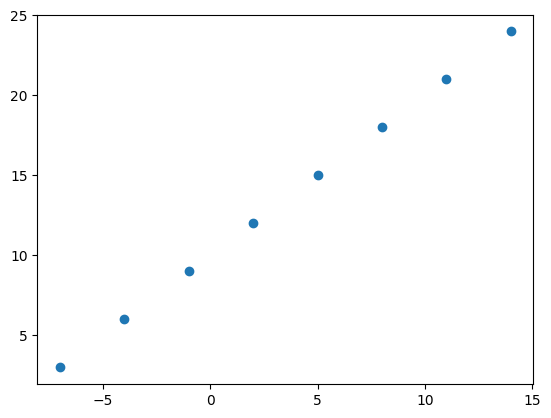

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

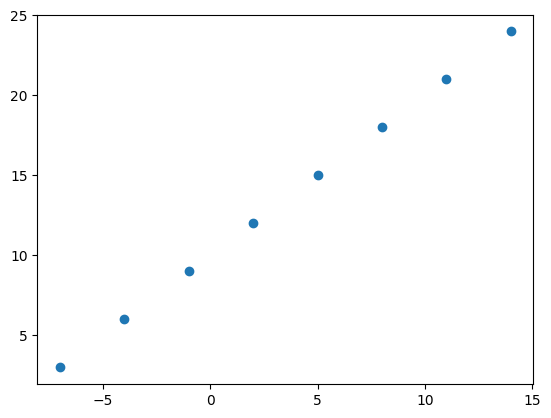

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model** - define the loss fuction (in other words, the function wich tells our model how wrong it is) and the optimizer (telss our model how to improve the patterns its learning) and evaluations metrics (what we can use to interpret the perfomance of our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 674ms/step - loss: 20.2938 - mae: 20.2938
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 20.0125 - mae: 20.0125
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 19.7313 - mae: 19.7313
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 19.4500 - mae: 19.4500
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 19.1688 - mae: 19.1688


In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[-19.92751]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we migth change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 14.0170 - mae: 14.0170
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.8845 - mae: 13.8845
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7520 - mae: 13.7520
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6195 - mae: 13.6195
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.4870 - mae: 13.4870
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3545 - mae: 13.3545
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2220 - mae: 13.2220
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0895 - mae: 13.0895
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9570 - mae: 12.9570
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8245 - mae: 12.8245
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[29.906157]], dtype=float32)

In [ ]:
# Let's see if we can make anoter to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hiden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 467ms/step - loss: 13.7899 - mae: 13.7899
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1993 - mae: 13.1993
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6121 - mae: 12.6121
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0223 - mae: 12.0223
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.4238 - mae: 11.4238
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8184 - mae: 10.8184
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2069 - mae: 10.2069
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5652 - mae: 9.5652
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8898 - mae: 8.8898
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1756 - mae: 8.1756
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 188ms/step


array([[32.128674]], dtype=float32)

In [ ]:
# Keep improving

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 806ms/step - loss: 13.6352 - mae: 13.6352
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9695 - mae: 12.9695
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3039 - mae: 12.3039
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6356 - mae: 11.6356
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9618 - mae: 10.9618
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2795 - mae: 10.2795
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.5857 - mae: 9.5857
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8774 - mae: 8.8774
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1518 - mae: 8.1518
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4063 - mae: 7.4063
Epoch 11/100
1/1 [==============================] - 0s 1

**learning_rate** is the most important parameter in neural networks

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[27.256315]], dtype=float32)

## Evaluating our model

In practice, a typical workdflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation.. there are 3 words you should memorize:

> Visualize, visualize, visualize

It's a good idea to visualize:
* **The data** - what data are we working with? What does it look like?
* **The model itself** - What does our model look like?
* **The training of a model** - How does a model perform while it learns?
* **The predictions of the model** - How do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

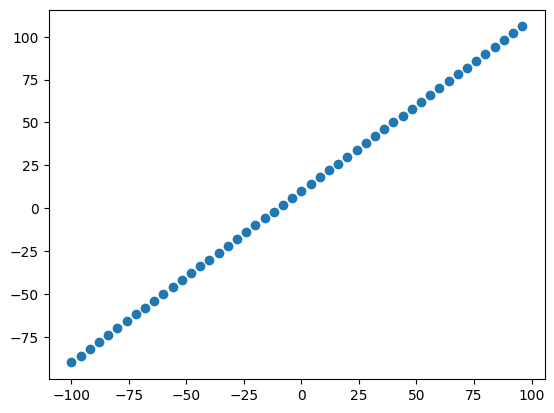

In [ ]:
# Visualize our data
plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model get tuned on this data, wich is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data availabel.
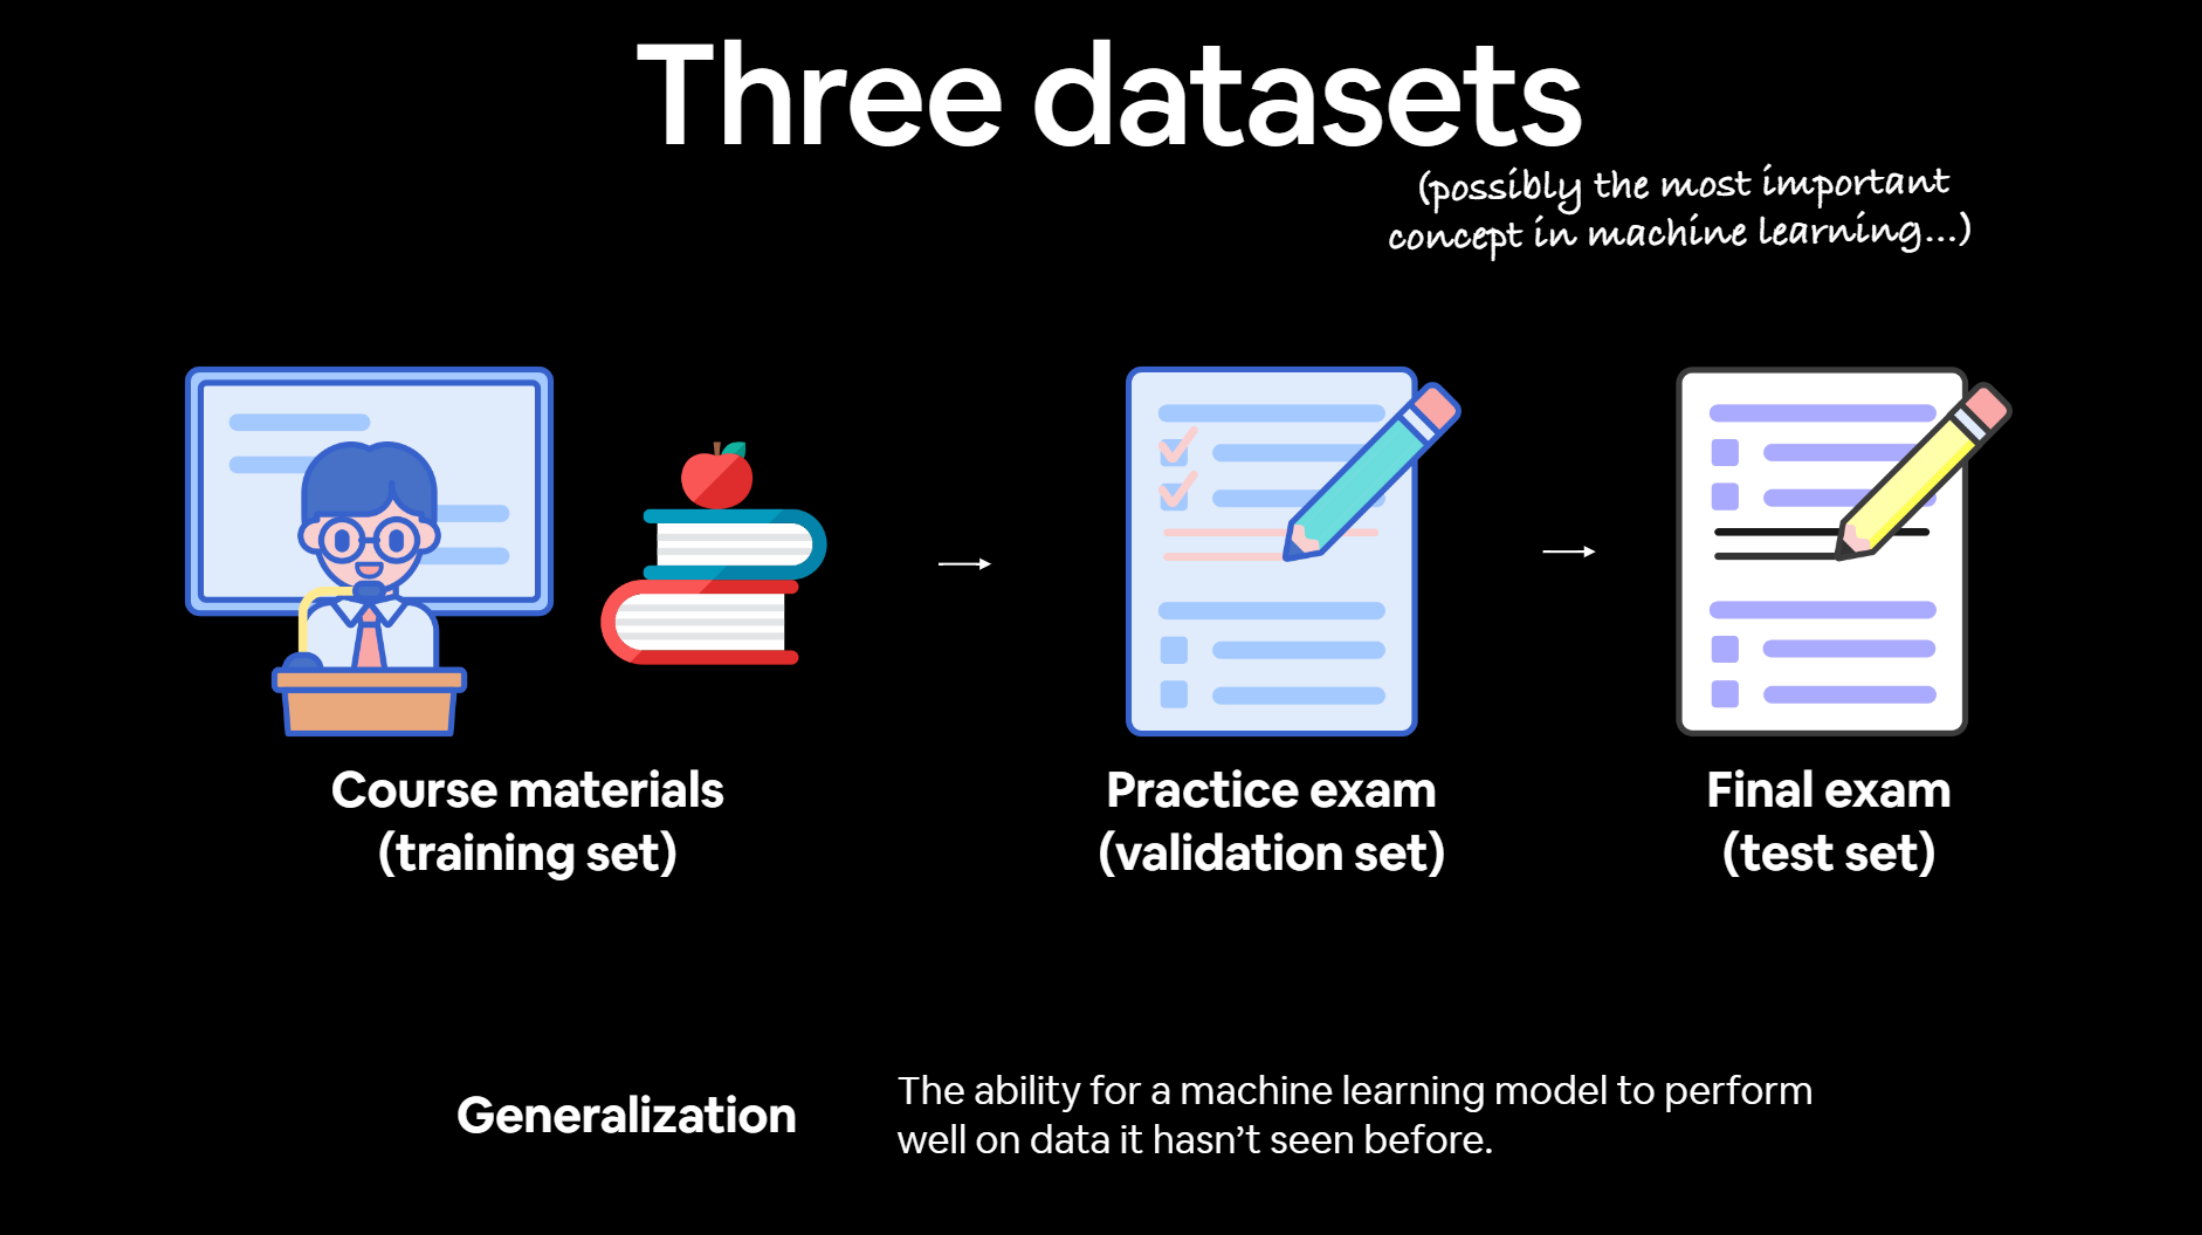

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

# Convert tu numpy to use train_test_split
X_np = X.numpy()
y_np = y.numpy()

# Divide the data
X_train_np, X_temp_np, y_train_np, y_temp_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
X_val_np, X_test_np, y_val_np, y_test_np = train_test_split(X_temp_np, y_temp_np, test_size=0.5, random_state=42)

# Convert to tensors
X_train = tf.constant(X_train_np)
y_train = tf.constant(y_train_np)
X_val = tf.constant(X_val_np)
y_val = tf.constant(y_val_np)
X_test = tf.constant(X_test_np)
y_test = tf.constant(y_test_np)

len(X_train), len(X_val), len(X_test)

(40, 5, 5)

### Visualizing the data

Now we've got our data training, validation and test set... let's visualize it again!

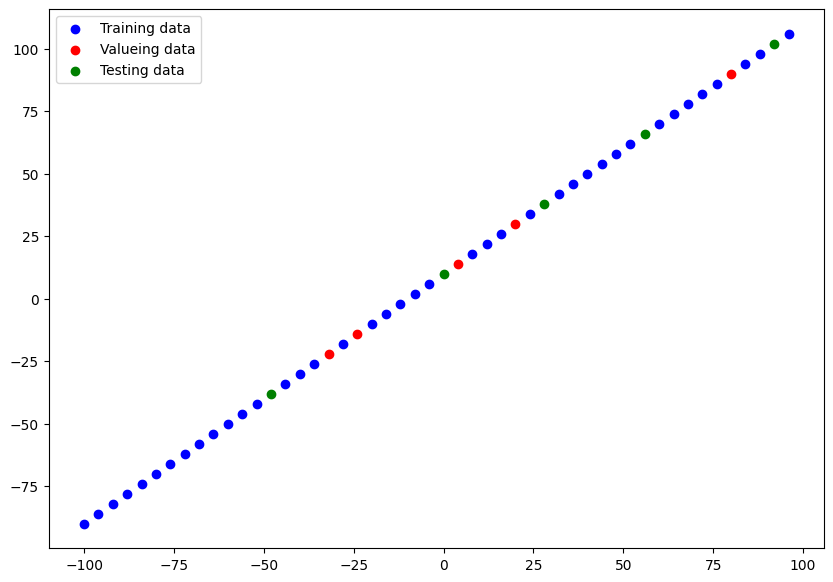

In [ ]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot valueing data in red
plt.scatter(X_val, y_val, c="r", label="Valueing data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Train the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, validation_data=(tf.expand_dims(X_val, axis=-1), y_val))

# 4. Test the model
test_loss, test_acc = model.evaluate(tf.expand_dims(X_test, axis=-1), y_test, verbose=1)

print("\nTest accuracy: ", test_acc)

Epoch 1/100
2/2 [==============================] - 1s 418ms/step - loss: 24.2568 - mae: 24.2568 - val_loss: 15.1207 - val_mae: 15.1207
Epoch 2/100
2/2 [==============================] - 0s 72ms/step - loss: 23.2688 - mae: 23.2688 - val_loss: 14.6860 - val_mae: 14.6860
Epoch 3/100
2/2 [==============================] - 0s 60ms/step - loss: 22.3190 - mae: 22.3190 - val_loss: 14.2463 - val_mae: 14.2463
Epoch 4/100
2/2 [==============================] - 0s 113ms/step - loss: 21.3381 - mae: 21.3381 - val_loss: 13.8018 - val_mae: 13.8018
Epoch 5/100
2/2 [==============================] - 0s 118ms/step - loss: 20.3291 - mae: 20.3291 - val_loss: 13.3504 - val_mae: 13.3504
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 19.3420 - mae: 19.3420 - val_loss: 12.8930 - val_mae: 12.8930
Epoch 7/100
2/2 [==============================] - 0s 65ms/step - loss: 18.3952 - mae: 18.3952 - val_loss: 12.4379 - val_mae: 12.4379
Epoch 8/100
2/2 [==============================] - 0s 79ms/

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

# Convert tu numpy to use train_test_split
X_np = X.numpy()
y_np = y.numpy()

# Divide the data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Convert to tensors
X_train = tf.constant(X_train_np)
y_train = tf.constant(y_train_np)
X_test = tf.constant(X_test_np)
y_test = tf.constant(y_test_np)

len(X_train), len(X_test)

In [ ]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [ ]:
from os import name
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss="mae",
              optimizer="SGD",
              metrics=["mae"])

In [ ]:
model.summary()

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in alredy learn patterns of parameters from other models during **transfer learning**)

📖**Resourse**: https://www.youtube.com/watch?v=QDX-1M5Nj7s

🛠️ **Exercise**: Try playing, around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model's predictions)

In [ ]:
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
y_pred

In [ ]:
y_test

🔑**Note**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [ ]:
# let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  # Plots training data, test data and compares predictions to ground truth labels
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()


In [ ]:
plot_predictions()

### Evaluating our model predictions with regression evaluation metrics

Depending of the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

In [ ]:
# Calculate the mean absolute error
tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

In [ ]:
# Calculate the mean square error
tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

### Running experimentes to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss="mae",
              optimizer="SGD",
              metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 51ms/step


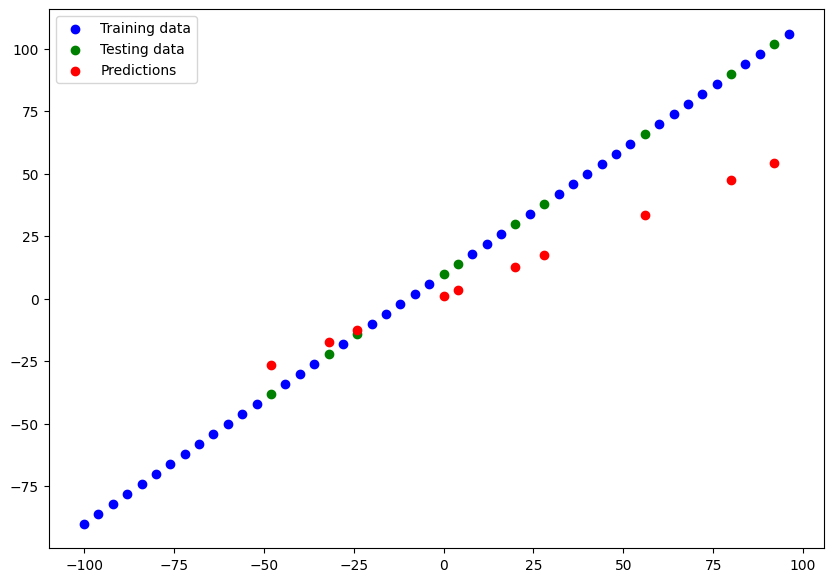

In [ ]:
# Make and plot predicctions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1.numpy(), mse_1.numpy()

(19.782345, 623.02325)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="mae",
              optimizer="SGD",
              metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 79ms/step


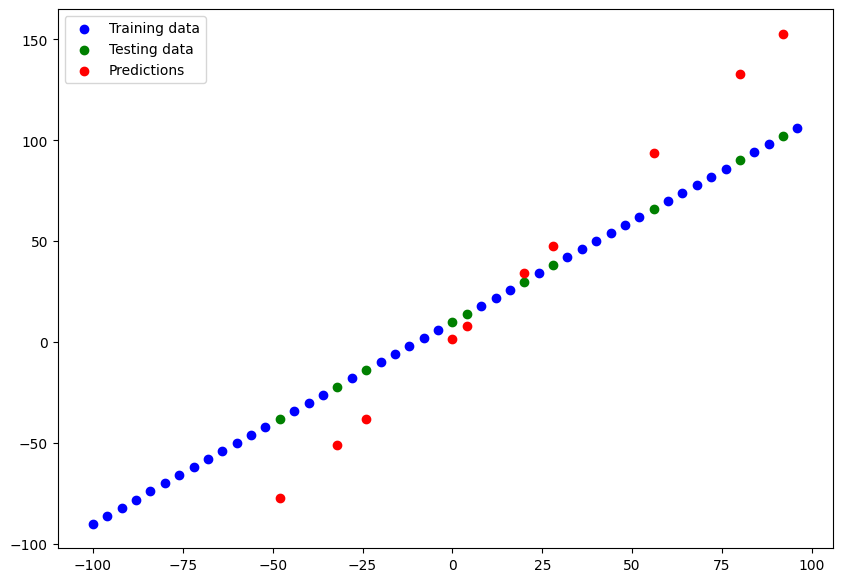

In [ ]:
# Make and plot predicctions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2.numpy(), mse_2.numpy()

(24.21718, 838.0548)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer="SGD",
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 53ms/step


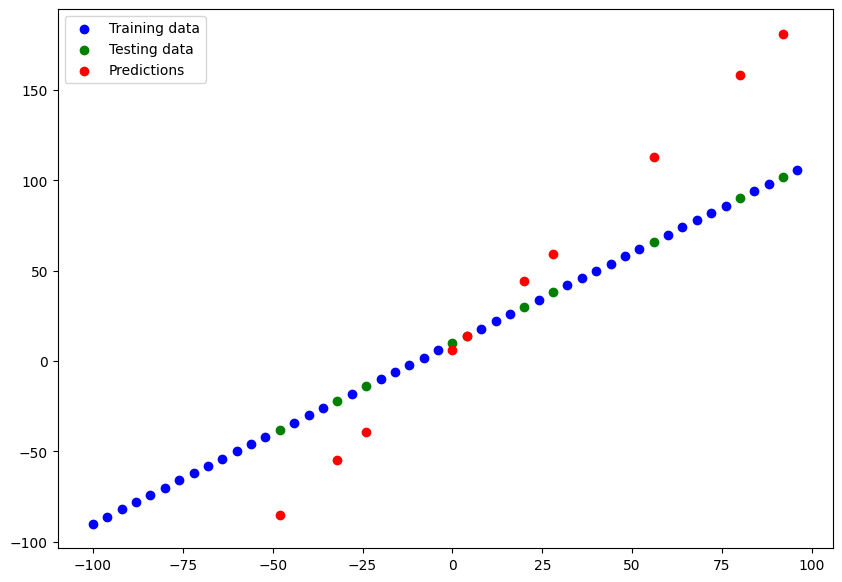

In [ ]:
# Make and plot predicctions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3.numpy(), mse_3.numpy()

(33.881382, 1770.2662)

🔑**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,19.782345,623.023254
1,model_2,24.217180,838.054810
2,model_3,33.881382,1770.266235


🔑**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you''ll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machile learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us.

📖**Resources**: As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorFlow)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model usin the SavedModel format
model_2.save("best_model_SaveModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a save model

In [ ]:
# Load in the SaveModel format model
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## A larger example

In [ ]:
# Imports
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try to one-hot encode our DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = tf.constant(insurance_one_hot.drop("charges", axis=1))
y = tf.constant(insurance_one_hot["charges"])

X, y

(<tf.Tensor: shape=(1338, 11), dtype=float64, numpy=
 array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])>,
 <tf.Tensor: shape=(1338,), dtype=float64, numpy=
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603])>)

In [ ]:
# Convert tu numpy to use train_test_split
X_np = X.numpy()
y_np = y.numpy()

# Divide the data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Convert to tensors
X_train = tf.constant(X_train_np)
y_train = tf.constant(y_train_np)
X_test = tf.constant(X_test_np)
y_test = tf.constant(y_test_np)

len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [ ]:
# Set random state
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(optimizer="SGD",
                loss="mae",
                metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the results 0f the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7283.3755 - mae: 7283.3755


[7283.37548828125, 7283.37548828125]

In [ ]:
y_pd = insurance_one_hot["charges"]
y_pd.median(), y_pd.mean()

(9382.033, 13270.422265141257)

Right now it looks like our model isn't performing too well.. let's try and improve it!
To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_2.compile(loss="mae",
                          optimizer="Adam",
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4748.1846 - mae: 4748.1846


[4748.1845703125, 4748.1845703125]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss="mae",
                          optimizer="Adam",
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3496.9319 - mae: 3496.9319


[3496.931884765625, 3496.931884765625]

Text(0.5, 0, 'epochs')

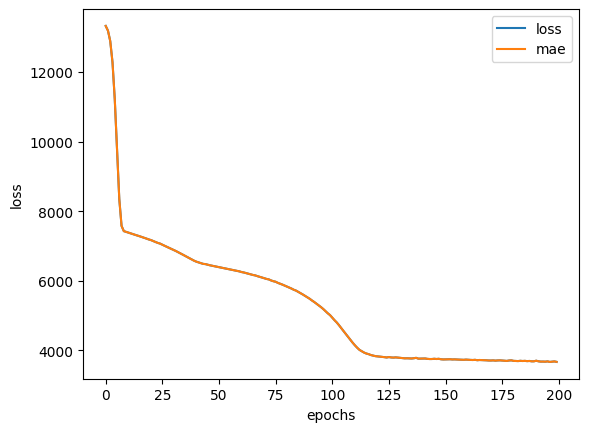

In [ ]:
# Plot history (alspo known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔**Question**: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization

If you're not sure which to use, you could try both and see wich performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-learn

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between o and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal_tf = tf.constant(X_train_normal)
X_test_normal_tf = tf.constant(X_test_normal)
y_train_tf = tf.constant(y_train)
y_test_tf = tf.constant(y_test)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss="mae",
                          optimizer="Adam",
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal_tf, y_train_tf, epochs=200, verbose=0)

In [ ]:
insurance_model_4.evaluate(X_test_normal_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 3170.0942 - mae: 3170.0942


[3170.09423828125, 3170.09423828125]

## 🛠️Excercises

Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [2]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2023-12-30 19:49:41.061930: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 19:49:41.142625: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 19:49:41.652353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 19:49:41.652399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 19:49:41.737717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [6]:
df_california_housing = pd.concat([
    pd.read_csv("california_housing_test.csv"),
    pd.read_csv("california_housing_train.csv")
], ignore_index=True)

df_california_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
19995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["longitude",	"latitude",	"housing_median_age",	"total_rooms", "total_bedrooms",	"population",	"households",	"median_income"])
)

X = df_california_housing.drop("median_house_value", axis=1)
y = df_california_housing["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal_tf = tf.constant(X_train_normal)
y_train_tf = tf.constant(y_train)
X_test_normal_tf = tf.constant(X_test_normal)
y_test_tf = tf.constant(y_test)

In [ ]:
tf.random.set_seed(42)

california_housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

california_housing_model.compile(loss="mae",
                                 optimizer="Adam",
                                 metrics=["mae"])

history = california_housing_model.fit(X_train_normal_tf, y_train_tf, epochs=200, verbose=1)

Epoch 1/200
500/500 [==============================] - 2s 3ms/step - loss: 206460.2656 - mae: 206460.2656
Epoch 2/200
500/500 [==============================] - 1s 2ms/step - loss: 196652.0156 - mae: 196652.0156
Epoch 3/200
500/500 [==============================] - 2s 4ms/step - loss: 165138.5469 - mae: 165138.5469
Epoch 4/200
500/500 [==============================] - 2s 4ms/step - loss: 118376.8906 - mae: 118376.8906
Epoch 5/200
500/500 [==============================] - 1s 1ms/step - loss: 90800.8594 - mae: 90800.8594
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 84931.1250 - mae: 84931.1250
Epoch 7/200
500/500 [==============================] - 1s 2ms/step - loss: 84158.8047 - mae: 84158.8047
Epoch 8/200
500/500 [==============================] - 1s 2ms/step - loss: 83640.2188 - mae: 83640.2188
Epoch 9/200
500/500 [==============================] - 1s 2ms/step - loss: 83104.7266 - mae: 83104.7266
Epoch 10/200
500/500 [==============================] - 

In [ ]:
y.mean()

207082.71675

Text(0.5, 0, 'epochs')

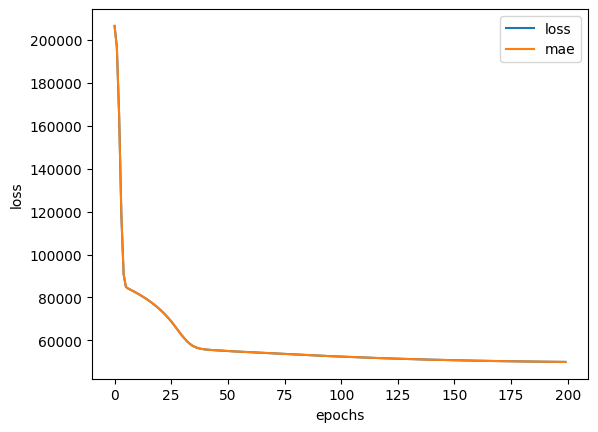

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
california_housing_model.evaluate(X_test_normal_tf, y_test_tf)

125/125 [==============================] - 1s 2ms/step - loss: 49519.8242 - mae: 49519.8242


[49519.82421875, 49519.82421875]